In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("data.csv")

In [4]:
#Standardization
for j in range(13):
    mean = np.mean(dataset.iloc[:, j])
    stdev = np.std(dataset.iloc[:, j])
    for i in range(1188):
        dataset.iloc[i, j] = (dataset.iloc[i,j]-mean)/(stdev)

In [5]:
dataset = dataset.fillna(0)
dataset

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,0.663691,-0.504401,-0.004835,-0.135730,-0.947503,-0.058124,-0.320151,0.872351,-0.585471,-0.879876,1.653671,-0.698942,-0.203325,453000.0
1,0.663691,0.457957,0.057463,-0.096182,0.911122,-0.058124,2.284912,-0.647228,0.265863,0.423736,-0.666115,0.540524,-0.116306,480000.0
2,-0.411978,-0.825187,-0.607049,-0.097170,-0.947503,-0.058124,-0.320151,-0.647228,-0.585471,-0.938073,0.493778,-0.611450,-0.172472,180500.0
3,-0.411978,1.741101,0.265123,-0.154685,0.911122,-0.058124,3.587443,-0.647228,0.265863,-0.169873,0.887704,0.759253,-0.330079,495000.0
4,0.663691,0.457957,0.109378,-0.118232,0.911122,-0.058124,-0.320151,-0.647228,0.265863,0.481933,-0.666115,0.365541,-0.153143,325000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,0.663691,0.457957,0.517430,-0.139553,0.911122,-0.058124,-0.320151,-0.647228,0.265863,0.939361,-0.666115,-0.013590,-0.295547,333000.0
1184,-1.487647,-0.183615,-0.409772,-0.187121,0.911122,-0.058124,-0.320151,-0.647228,-0.585471,-0.100036,-0.666115,-0.932253,-0.330451,450000.0
1185,0.663691,0.457957,0.950401,-0.151850,0.911122,-0.058124,-0.320151,-0.647228,0.265863,1.424724,-0.666115,1.488351,-0.189200,776000.0
1186,0.663691,-0.825187,0.026314,-0.077307,-0.947503,-0.058124,-0.320151,0.872351,-0.585471,0.388818,-0.666115,-0.378139,-0.096903,400000.0


In [6]:
training_data = dataset[:951]   ##80 percent training
testing_data = dataset[951:]    ##20 percent testing

#testing_data

In [7]:
#converting to matrix

y= np.array(training_data.iloc[: , 13])
y = y.reshape(-1, 1)
y = np.matrix(y)


ytest = np.array(testing_data.iloc[:, 13])
ytest = ytest.reshape(-1, 1)
ytest = np.matrix(ytest)

In [8]:
def findrmserror(training_data, independent, dependent):
    matindependent = np.zeros(951)
    matindependent = np.matrix(matindependent)
    matindependent = matindependent.T
    for variable in independent:
        x = np.array(training_data.iloc[: , variable])
        x = x.reshape(-1, 1)
        x = np.matrix(x)
        matindependent = np.c_[matindependent, x]
    
    matindependent = matindependent[:, 1:]
    matindependent = np.c_[matindependent, np.ones(951)]
    a = np.linalg.inv(np.dot(matindependent.T, matindependent))
    b = np.dot(matindependent.T, dependent)
    betahat = np.dot(a,b)
    ncols = matindependent.shape[1]
    for j in range(ncols):
        matindependent[:, j] = matindependent[:, j]*betahat[j]
    
    
    y_predicted = np.ndarray.sum(matindependent, axis=1)
    rmserror = 0
    y_predicted = y_predicted.T
    for i in range(951):
        rmserror = rmserror + (y_predicted[i].item()-dependent[i].item())*(y_predicted[i].item()-dependent[i].item())
        
        
    return (rmserror/951)**0.5

In [9]:
def findrmstesting(testing_data, independent, dependent):
    matindependent = np.zeros(237)
    matindependent = np.matrix(matindependent)
    matindependent = matindependent.T
    for variable in independent:
        x = np.array(testing_data.iloc[: , variable])
        x = x.reshape(-1, 1)
        x = np.matrix(x)
        matindependent = np.c_[matindependent, x]
    
    matindependent = matindependent[:, 1:]
    matindependent = np.c_[matindependent, np.ones(237)]
    a = np.linalg.inv(np.dot(matindependent.T, matindependent))
    b = np.dot(matindependent.T, dependent)
    betahat = np.dot(a,b)
    ncols = matindependent.shape[1]
    for j in range(ncols):
        matindependent[:, j] = matindependent[:, j]*betahat[j]
    
    
    y_predicted = np.ndarray.sum(matindependent, axis=1)
    rmserror = 0
    y_predicted = y_predicted.T
    
    for i in range(237):
        rmserror = rmserror + (y_predicted[i].item()-dependent[i].item())*(y_predicted[i].item()-dependent[i].item())
        
        
    return (rmserror/237)**0.5

In [20]:
#greedy forward propogation

subset1 = []
rms_list_forward_training = []
rms_list_1 = []
finalrmserror = findrmserror(training_data, [0], y)+1
for j in range(13):
    tobadded = -1
    for i in range(13): 
        temp_copy = subset1.copy()
        if (i not in temp_copy):
            temp_copy.append(i)
            temprms = findrmserror(training_data, temp_copy, y)
            temp_list = []
            temp_list.append(temp_copy)
            temp_list.append(temprms)
            rms_list_1.append(temp_list)
            if(temprms<=finalrmserror):
                finalrmserror = temprms
                tobeadded = i
    if(tobeadded!=-1):
        subset1.append(tobeadded)
        rms_list_forward_training.append(finalrmserror)

In [21]:
subset1

[2, 6, 8, 7, 12, 11, 5, 3, 0, 9, 10, 4, 1]

In [22]:
rms_list_forward_training

[232143.49885231513,
 219709.22987609988,
 209930.44933705634,
 208217.86902659785,
 207094.555988603,
 206672.81862741298,
 206331.91701474937,
 206083.5149918623,
 205956.9159562135,
 205875.34298514528,
 205425.040744833,
 205407.1243940093,
 205386.17608525965]

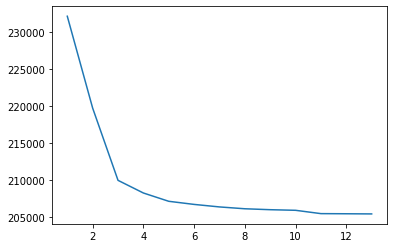

In [13]:
x = [1,2,3,4,5,6,7,8,9,10, 11, 12, 13]
plt.plot(x, rms_list_forward_training)

In [23]:
rms_list_1

[[[0], 302474.12202858564],
 [[1], 269496.05514510133],
 [[2], 232143.49885231513],
 [[3], 320584.9333037],
 [[4], 307707.93304417946],
 [[5], 318351.274436827],
 [[6], 293859.31425738137],
 [[7], 320855.3615781929],
 [[8], 240698.70836633164],
 [[9], 256224.87450607942],
 [[10], 309317.9030217111],
 [[11], 259318.44556313608],
 [[12], 320531.0546926183],
 [[2, 0], 230749.62253710788],
 [[2, 1], 231972.34446984058],
 [[2, 3], 232129.0455026728],
 [[2, 4], 231585.9571222832],
 [[2, 5], 230714.58069770737],
 [[2, 6], 219709.22987609988],
 [[2, 7], 231578.3915055776],
 [[2, 8], 222129.04650986163],
 [[2, 9], 231762.5408425702],
 [[2, 10], 232060.6734089785],
 [[2, 11], 229113.40671422557],
 [[2, 12], 231382.09859723336],
 [[2, 6, 0], 219034.7078031902],
 [[2, 6, 1], 219317.7025888165],
 [[2, 6, 3], 219337.9994666642],
 [[2, 6, 4], 218713.78259688715],
 [[2, 6, 5], 219615.52474062555],
 [[2, 6, 7], 219452.16398860488],
 [[2, 6, 8], 209930.44933705634],
 [[2, 6, 9], 218411.09118198074],
 [[

In [28]:
#backward feature elimination
subset2 = [0,1,2,3,4,5,6,7,8,9,10,11,12]
finalrmserror = findrmserror(training_data, subset2, y)
rms_list_backward_training = []
rms_list_2 = []
rms_list_2.append(subset2)
rms_list_2.append(finalrmserror)
for j in range(13):
    toberemoved = -1
    for i in range(13):
        temp_copy = subset2.copy()
        if(i in temp_copy):
            temp_copy.remove(i)
            temprms = findrmserror(training_data, temp_copy, y)
            temp_list = []
            temp_list.append(temp_copy)
            temp_list.append(temprms)
            rms_list_2.append(temp_list)
            if(temprms<=finalrmserror):
                finalrmserror = temprms
                toberemoved = i
    if(toberemoved!=-1):
        subset2.remove(tobremoved)
        rms_list_backward_training.append(finalrmserror)
    else:
        break

In [15]:
subset2

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [29]:
rms_list_2

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 205386.1760852597,
 [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 205525.57706796614],
 [[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 205407.12439400936],
 [[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 205586.13311375462],
 [[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12], 205656.2431171254],
 [[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12], 205416.75096766706],
 [[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12], 205669.51334337526],
 [[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12], 214233.58852880143],
 [[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12], 207316.8310003337],
 [[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12], 212685.131098646],
 [[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12], 205898.14718023088],
 [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12], 205856.2781337891],
 [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12], 205686.35427596237],
 [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 206657.11571947273]]

In [16]:
training_error_forward = findrmserror(training_data, subset1, y)
training_error_forward

205386.17608525965

In [17]:
training_error_backward = findrmserror(training_data, subset2, y)
training_error_backward

205386.1760852597

In [18]:
testing_error_forward = findrmstesting(testing_data, subset1, ytest)

testing_error_forward

294616.3470833846

In [19]:
testing_error_backward = findrmstesting(testing_data, subset1, ytest)

testing_error_backward

294616.3470833846